In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv("./HousingData.csv")

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Checking And Dealing with Null values

In [11]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [12]:
# Crim, Zn, Indus, chas, lstat, age has 20 null values.

# CHAS is a catagorical column so ,I will replace all the missing values with 0
df["CHAS"] = df["CHAS"].fillna(0)

#lSTAT, Zn, Indus, chas, age are continous data , i will replace mising value with mean
df["LSTAT"] = df["LSTAT"].fillna(df["LSTAT"].mean())
df["ZN"] = df["ZN"].fillna(df["ZN"].mean())
df["INDUS"] = df["INDUS"].fillna(df["INDUS"].mean())
df["CRIM"] = df["CRIM"].fillna(df["CRIM"].mean())
df["AGE"] = df["AGE"].fillna(df["AGE"].mean())

In [13]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Checking for Outliers

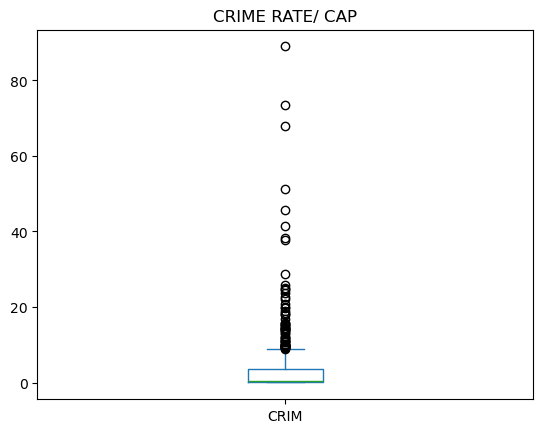

367    13.5222
373    11.1081
374    18.4982
375    19.6091
376    15.2880
Name: CRIM, dtype: float64

In [15]:
# Numerical columns are (CRIM, ZN, INDUS, NOX, RM, AGE, DIS, 
# RAD, TAX, PTRATIO, B, LSTAT, MEDV).
# Now LETS visulize outliers with box plot
df["CRIM"].plot(kind = "box", title = "CRIME RATE/ CAP")
plt.show()
df[df["CRIM"] > 10]["CRIM"].head()

<Axes: ylabel='Frequency'>

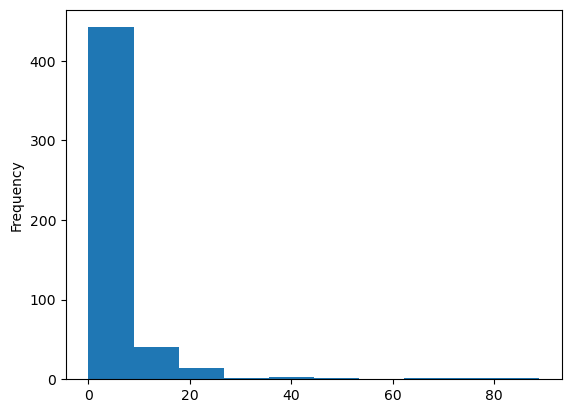

In [16]:
df["CRIM"].plot(kind = "hist")
# We can see our CRIM column Right Skewed and 
# Box plot was showing many outliers.
# But we cant remove all of them so i will 
# only consider CRIM values below 30.

In [17]:
df[df["CRIM"] > 30]["CRIM"].count()

8

In [18]:
df = df[df["CRIM"] < 30]  # removing after 30

In [19]:
df["CRIM"].count()

498

<Axes: >

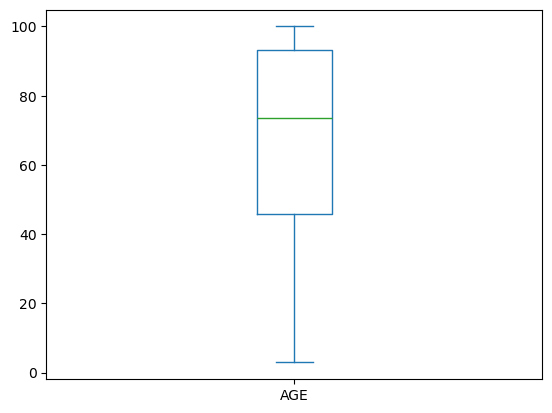

In [20]:
# Now for AGE column
df["AGE"].plot(kind = "box")
# NO outliers

<Axes: >

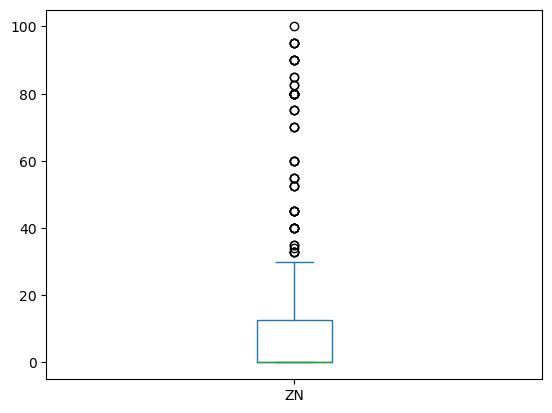

In [21]:
# Now for  ZN
df["ZN"].plot(kind = "box")
# ZN have some outliers

<Axes: ylabel='Frequency'>

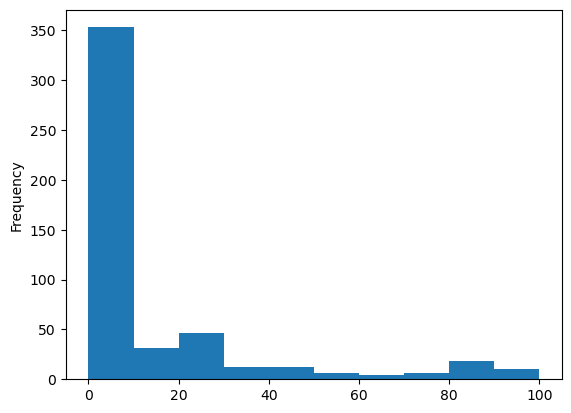

In [22]:
# Lets check the skewness of ZN
df["ZN"].plot(kind = "hist")
# WE can se ZN is right skewed, i think these outliers
# are import, so will not remove these.


In [23]:
# Checking other Function using IQR 

def  check_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return f"Total outliers in {col} column: {len(outliers)}"

In [24]:
# USing the function for other columns

In [25]:
# For  INDUS
check_outliers("INDUS")

'Total outliers in INDUS column: 0'

In [26]:
# For  NOX
check_outliers("NOX")

'Total outliers in NOX column: 0'

In [27]:
# For  RM
check_outliers("RM")

'Total outliers in RM column: 29'

In [28]:
# For  DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV
check_outliers("DIS")

'Total outliers in DIS column: 5'

In [29]:
# For RAD, TAX, PTRATIO, B, LSTAT, MEDV
check_outliers("RAD")

'Total outliers in RAD column: 124'

In [30]:
# For TAX, PTRATIO, B, LSTAT, MEDV
check_outliers("TAX")

'Total outliers in TAX column: 0'

In [31]:
# For PTRATIO, B, LSTAT, MEDV
check_outliers("PTRATIO")

'Total outliers in PTRATIO column: 0'

In [32]:
# For B, LSTAT, MEDV
check_outliers("B")

'Total outliers in B column: 73'

In [33]:
# For LSTAT, MEDV
check_outliers("LSTAT")

'Total outliers in LSTAT column: 10'

In [34]:
# For MEDV
check_outliers("MEDV")

'Total outliers in MEDV column: 38'

# Implement OLS regression

In [36]:
X = df.drop('MEDV', axis=1)

In [37]:
y = df["MEDV"]

In [38]:
import statsmodels.api as sm

In [39]:
#Define the model
X = sm.add_constant(X)
model = sm.OLS(y,X)

In [40]:
#Fit the model
result = model.fit()

In [41]:
#Print the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     98.34
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          1.25e-126
Time:                        12:40:47   Log-Likelihood:                -1483.8
No. Observations:                 498   AIC:                             2996.
Df Residuals:                     484   BIC:                             3055.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.7820      5.257      6.236      0.0

## Conclusion : 
 - Model explains about 72% of the variance,here's still about 28% unexplained. 